In [313]:
import numpy as np
import pandas as pd

In [314]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [315]:
df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2811,ham,"Say this slowly.? GOD,I LOVE YOU &amp; I NEED ...",NaN,NaN,NaN
410,ham,Come by our room at some point so we can iron ...,NaN,NaN,NaN
2621,ham,Lol! Nah wasn't too bad thanks. Its good to b ...,NaN,NaN,NaN
4681,ham,"Haha yeah, 2 oz is kind of a shitload",NaN,NaN,NaN
2732,ham,How dare you stupid. I wont tell anything to y...,NaN,NaN,NaN
5044,ham,We have sent JD for Customer Service cum Accou...,NaN,NaN,NaN
4499,ham,Nvm take ur time.,NaN,NaN,NaN
4139,ham,Leave it wif me lar... ÌÏ wan to carry meh so ...,NaN,NaN,NaN
844,ham,K.k:)when are you going?,NaN,NaN,NaN
4248,ham,Loosu go to hospital. De dont let it careless.,NaN,NaN,NaN


### 1. Cleaning of data

In [316]:
# dropping last 3 columns
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [317]:
# Renaming columns names to meaningful names
df.rename(columns = {'v1' : 'Result', 'v2' : 'Sample text'}, inplace = True)

In [318]:
df.sample(10)

,Result,Sample text
2221,ham,I notice you like looking in the shit mirror y...
3790,spam,"Twinks, bears, scallies, skins and jocks are c..."
5022,ham,Anyway holla at me whenever you're around beca...
2637,ham,No I don't have cancer. Moms making a big deal...
932,ham,So do you have samus shoulders yet
780,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...
4184,ham,I'm good. Have you registered to vote?
1989,ham,The basket's gettin full so I might be by tonight
892,ham,Nutter. Cutter. Ctter. Cttergg. Cttargg. Ctarg...
2777,ham,Kind of. Took it to garage. Centre part of exh...


In [319]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [320]:
df['Result'] = encoder.fit_transform(df['Result'])

In [321]:
df.head()
# Assigned values -> ham as 0, spam as 1

,Result,Sample text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [322]:
# Checking for missing values
df.isnull().sum()

Result         0
Sample text    0
dtype: int64

In [323]:
# No missing values found

In [324]:
# Checking for duplicate values
df.duplicated().sum()

403

In [325]:
# Dropping duplicate values while keeping only one
df = df.drop_duplicates(keep = 'first')

In [326]:
df.duplicated().sum()

0

In [327]:
df.shape

(5169, 2)

### 2. EDA

In [328]:
df.head()

,Result,Sample text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [329]:
df['Result'].value_counts()

Result
0    4516
1     653
Name: count, dtype: int64

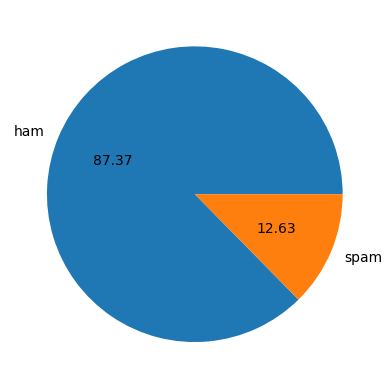

In [330]:
import matplotlib.pyplot as plt
plt.pie(df['Result'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f")
plt.show()

In [331]:
# Piechart shows that data is imbalanced

In [332]:
import nltk

In [333]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [334]:
df['Characters count'] = df['Sample text'].apply(len)

In [335]:
df['Words count'] = df['Sample text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [336]:
df['Sentences count'] = df['Sample text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [337]:
df.head()

,Result,Sample text,Characters count,Words count,Sentences count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [338]:
# Description of all sample messages
df[['Characters count', 'Words count', 'Sentences count']].describe()

,Characters count,Words count,Sentences count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [339]:
# Description of ham sample messages
df[df['Result'] == 0][['Characters count', 'Words count', 'Sentences count']].describe()

,Characters count,Words count,Sentences count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [340]:
# Description of spam sample messages
df[df['Result'] == 1][['Characters count', 'Words count', 'Sentences count']].describe()

,Characters count,Words count,Sentences count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [341]:
import seaborn as sns

<Axes: xlabel='Characters count', ylabel='Count'>

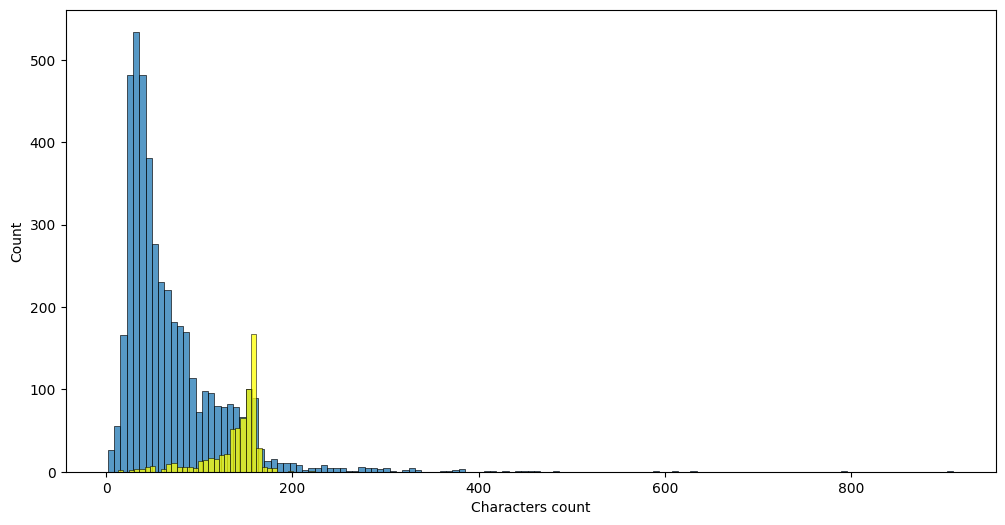

In [342]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Result'] == 0]['Characters count'])
sns.histplot(df[df['Result'] == 1]['Characters count'], color = 'yellow')

<Axes: xlabel='Words count', ylabel='Count'>

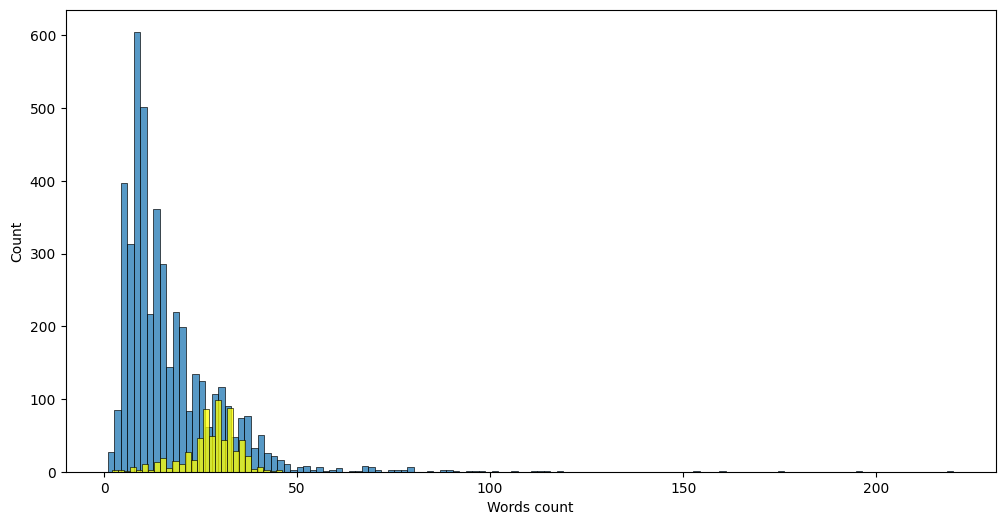

In [343]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Result'] == 0]['Words count'])
sns.histplot(df[df['Result'] == 1]['Words count'], color = 'yellow')

<Axes: xlabel='Sentences count', ylabel='Count'>

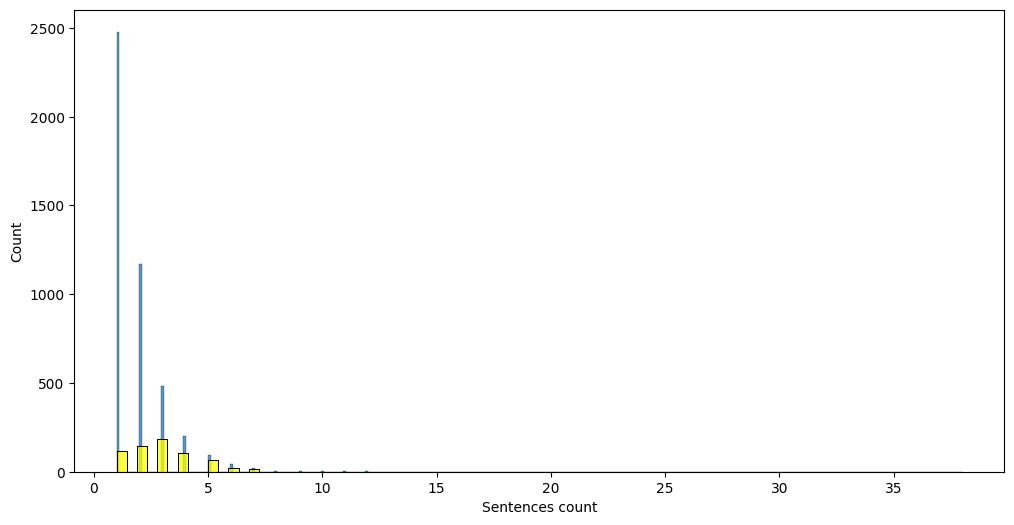

In [344]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Result'] == 0]['Sentences count'])
sns.histplot(df[df['Result'] == 1]['Sentences count'], color = 'yellow')

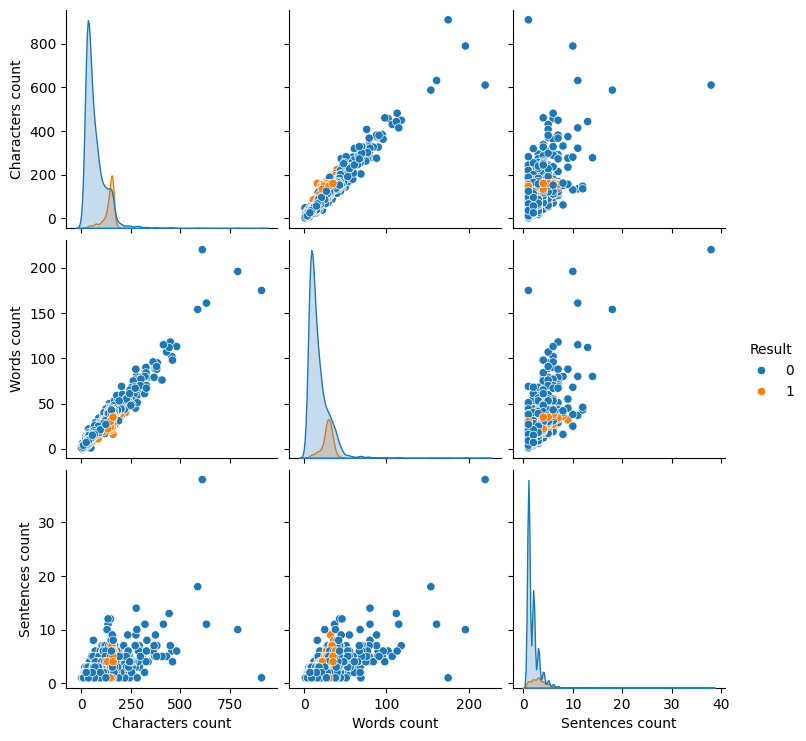

In [345]:
sns.pairplot(df, hue = 'Result')

<Axes: >

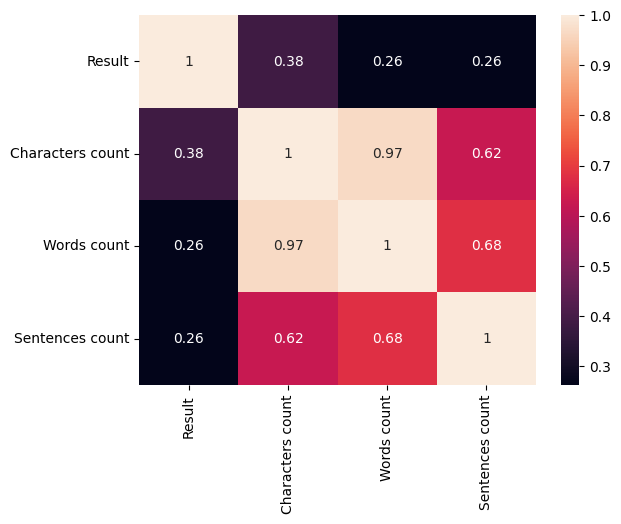

In [346]:
df_numeric = df.select_dtypes(include = [float, int])
sns.heatmap(df_numeric.corr(), annot = True)

### 3. Data preprocessing

In [347]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [348]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [349]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [350]:
df['Transformed text'] = df['Sample text'].apply(transform_text)

In [351]:
df.head()

,Result,Sample text,Characters count,Words count,Sentences count,Transformed text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [352]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size = 10, background_color = 'black')

In [353]:
spam_wc = wc.generate(df[df['Result'] == 1]['Transformed text'].str.cat(sep = " "))

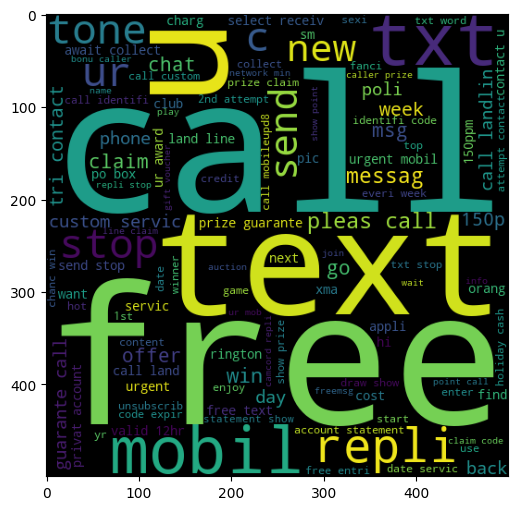

In [354]:
plt.figure(figsize = (15, 6))
plt.imshow(spam_wc)

In [355]:
ham_wc = wc.generate(df[df['Result'] == 0]['Transformed text'].str.cat(sep = " "))

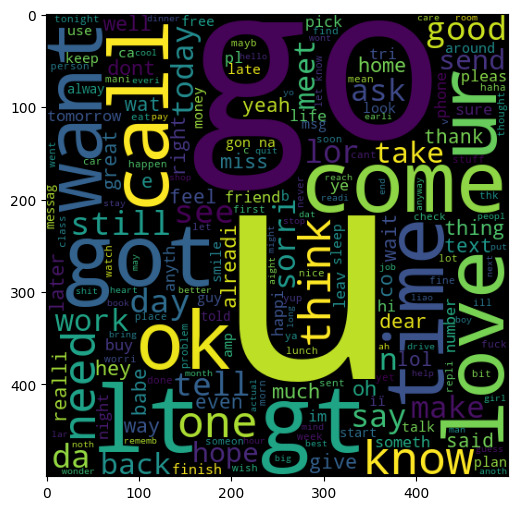

In [356]:
plt.figure(figsize = (15, 6))
plt.imshow(ham_wc)

In [357]:
spam_corpus = []
for msg in df[df['Result'] == 1]['Transformed text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

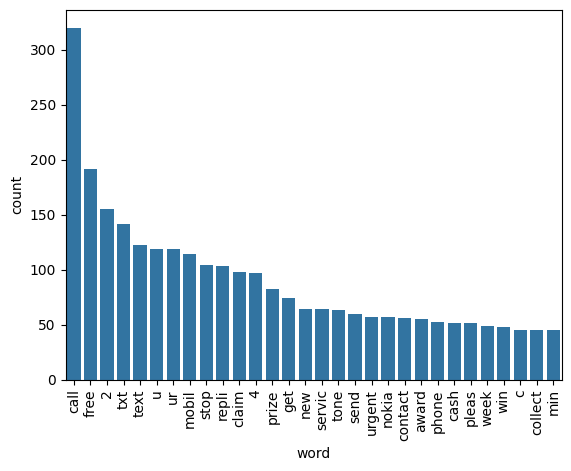

In [358]:
from collections import Counter
word_count = Counter(spam_corpus).most_common(30)
df_word_count = pd.DataFrame(word_count, columns = ['word', 'count'])
sns.barplot(x = 'word', y = 'count', data = df_word_count)
plt.xticks(rotation = 'vertical')
plt.show()

In [359]:
ham_corpus = []
for msg in df[df['Result'] == 0]['Transformed text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

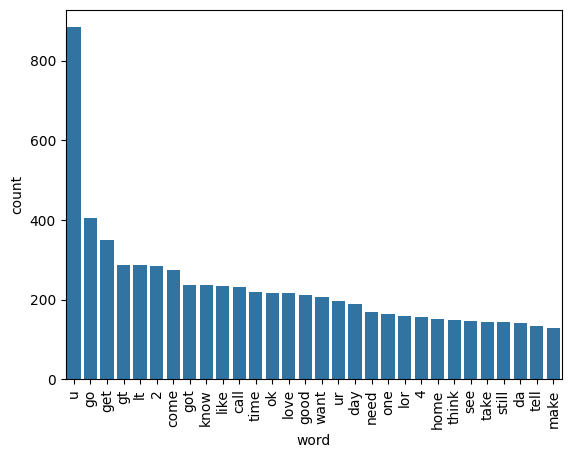

In [360]:
from collections import Counter
word_count = Counter(ham_corpus).most_common(30)
df_word_count = pd.DataFrame(word_count, columns = ['word', 'count'])
sns.barplot(x = 'word', y = 'count', data = df_word_count)
plt.xticks(rotation = 'vertical')
plt.show()

### 4. Model building

In [361]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [362]:
X = tfidf.fit_transform(df['Transformed text']).toarray()

In [363]:
y = df['Result'].values

In [364]:
from sklearn.model_selection import train_test_split

In [365]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [366]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [367]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [368]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [369]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [370]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))


0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [371]:
# On basis of above analysis we will choose tfidf and Multinomial Naive Bayes

In [372]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [373]:
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
abc = AdaBoostClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50,random_state = 2)
xgb = XGBClassifier(n_estimators = 50,random_state = 2)

In [374]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB' : mnb, 
    'DT' : dtc, 
    'LR' : lrc, 
    'RF' : rfc, 
    'AdaBoost' : abc, 
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [375]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy, precision

In [376]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.8367346938775511
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [377]:
performance_df = pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy' : accuracy_scores, 'Precision' : precision_scores}).sort_values('Precision', ascending = False)

In [378]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
7,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
9,xgb,0.967118,0.926230
8,GBDT,0.946809,0.919192
3,DT,0.930368,0.836735


In [379]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [380]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,DT,Accuracy,0.930368


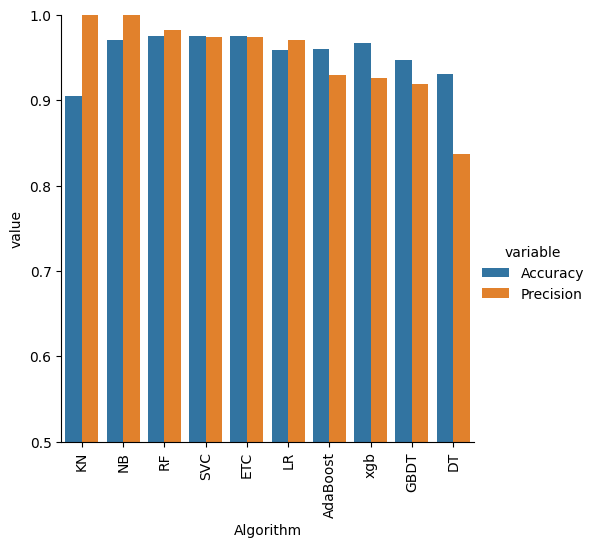

In [381]:
sns.catplot(x = 'Algorithm', y = 'value', 
               hue = 'variable', data = performance_df1, kind = 'bar', height = 5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation = 'vertical')
plt.show()

In [382]:
# We will use Multinomial Naive Bayes (MNB) in this project

In [383]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))